# Inteligencia Artificial
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)
Dra. Soledad Espezua Llerena (sespezua@pucp.edu.pe )

## Algoritmo Ant Colony Optimization (ACO) para resolver el problema del cajero viajante

En este notebook se presenta la implementación del algoritmo de colonia de hormigas para encontrar rutas optimas para el problema del cajero viajante. La clase que implementa el algoritmo es ACO_TSP. Se debe proporcionar al constructor una matriz de costos entre nodos, asi como parametros del algoritmo ACO 


In [1]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class ACO_TSP(object):
    
    def __init__(self, cost_matrix, num_ants, num_elite_ants, max_iter, rho=0.95, alpha=1, beta=1):
        """
        Argumentos:
            cost_matrix: Matriz de costos ((2D numpy.array)). La diagonal se asume np.inf.
            num_ants: Numero de hormigas
            num_elite_ants: Numero de mejores hormigas habilitadas a depositar feromonas
            max_iter: Maximo numero de iteraciones
            rho: Factor de evaporacion. Valor 1 significa evaporacion total en una iteracion
            alpha: exponente del rastro de feromona
            beta:  exponente de la facilidad de transicion
        Example:
            ant_colony = ACO_TSP(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.cost_matrix  = cost_matrix
        self.pheromone_matrix = np.ones(self.cost_matrix.shape) / len(cost_matrix)
        self.num_ants = num_ants
        self.num_elite_ants = num_elite_ants
        self.max_iter = max_iter
        self.rho = rho
        self.alpha = alpha
        self.beta = beta

    ## Metodo principal que realiza la optimizacion ACO en un problema TSP
    def optimize(self):
        best_path = None   # el mejor camino de la iteracion
        best_path_alltime = ("placeholder", np.inf)  # para almacenar el mejor camino encontrado hasta ahora
        
        for i in range(self.max_iter):   # por cada iteracion
            ant_paths = self.find_ant_paths()   # encuentra los caminos de todas hormigas
            self.deposit_pheronome(ant_paths, self.num_elite_ants)  # deposita feromonas en los paths de las hormigas elite
            best_path = min(ant_paths, key=lambda x: x[1])   # devuelve el camino menos costoso
            print (best_path)
            if best_path[1] < best_path_alltime[1]:
                best_path_alltime = best_path            
            self.pheromone_matrix = self.pheromone_matrix * (1-self.rho) # evapora las feromonas
        return best_path_alltime   # retorna el mejor camino encontrado en toda la optimizacion

    ## Deposita feromonio en buenos caminos
    def deposit_pheronome(self, ant_paths, num_elite_ants): 
        sorted_paths = sorted(ant_paths, key=lambda x: x[1])  # ordena los paths por su costo
        for path, path_cost in sorted_paths[:num_elite_ants]: # por cada path de una hormiga de elite
            for edge in path:   # por cada arco del path de una hormiga de elite
                self.pheromone_matrix[edge] += 1.0 / self.cost_matrix[edge] # deposita feromonio en el arco

    ## Obtiene el costo de un camino
    def get_path_cost(self, path):
        path_cost = 0.0
        for edge in path:
            path_cost += self.cost_matrix[edge]
        return path_cost

    ## Encuentra los caminos de las hormiga
    def find_ant_paths(self):
        ant_paths = []
        for i in range(self.num_ants):  # por cada hormiga
            path = self.gen_ant_path(0) # obtiene el camino de hormiga i empexando en nodo 0
            ant_paths.append( (path, self.get_path_cost(path)) )
        return ant_paths
    
    ## Explora un camino para una hormiga
    def gen_ant_path(self, start_node):
        path = []
        visited_nodes = set()   # para almacenar los nodos visitados
        visited_nodes.add(start_node)
        current_node = start_node
        for i in range(len(self.cost_matrix) - 1):  # para cada arista del camino a construir
            next_node = self.pick_next_node( current_node, visited_nodes ) # escoge un nodo a saltar
            path.append( (current_node, next_node) )
            current_node = next_node
            visited_nodes.add(next_node)
        path.append((current_node, start_node)) # coloca la ultima arista hasta el nodo inicial para cerrar el camino    
        return path

    ## Escoje el nodo siguiente desde el nodo actual (node) basado en probabilidades ACO
    def pick_next_node(self, node, visited):
        
        cost_row      = self.cost_matrix[node]   # obtiene los costos de saltar a cada nodo desde node
        pheromone_row = np.copy(self.pheromone_matrix[node]) # obtiene las feromonas de cada arista desde node
        pheromone_row[list(visited)] = 0    # las aristas a los nodos ya visitados son inhabilitadas colocando feromona 0 

        # calcula probabilidades de aristas
        prob_row = pheromone_row ** self.alpha * (( 1.0 / cost_row) ** self.beta)
        prob_row = prob_row / prob_row.sum()     

        nodes = range(len(self.cost_matrix))
        next_node = np_choice(nodes, 1, p=prob_row)[0]   # escoje el siguiente nodo segun las probabilidades (ruleta)
        
        return next_node
    


## Probando el algoritmo

Ejemplo 1

In [2]:
costos = np.array([[np.inf, 2, 2, 5, 7],
                   [2, np.inf, 4, 8, 2],
                   [2, 4, np.inf, 1, 3],
                   [5, 8, 1, np.inf, 2],
                   [7, 2, 3, 2, np.inf]])
num_ants=3
num_elite_ants=1
max_iter=10
aco = ACO_TSP(costos, num_ants, num_elite_ants, max_iter, rho=0.95, alpha=1, beta=1)
camino_aco = aco.optimize()
print ("Tour encontrado por ACO: {}".format(camino_aco))

([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
Tour encontrado por ACO: ([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)


Ejemplo 2

Creando una matriz de costos de 20 ciudades con distancias generadas aleatoriamente

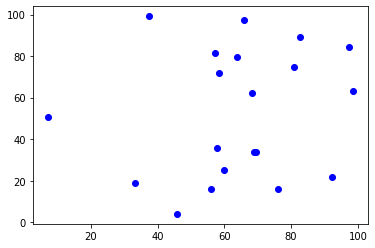

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial import distance
N= 20
puntos = 100*np.random.random((N,2))
dist_matrix = distance.cdist(puntos, puntos)
for i in range(N):  dist_matrix[i,i] = np.inf
#print (dist_matrix) 
plt.plot(puntos[:,0], puntos[:,1], 'o', color='blue')

In [4]:
num_ants=15
num_elite_ants=1
max_iter=10
aco = ACO_TSP(dist_matrix, num_ants, num_elite_ants, max_iter, rho=0.5, alpha=1, beta=1)
camino_aco = aco.optimize()
print ("Tour encontrado por ACO: {}".format(camino_aco))

([(0, 13), (13, 1), (1, 16), (16, 17), (17, 9), (9, 12), (12, 4), (4, 3), (3, 2), (2, 15), (15, 6), (6, 8), (8, 5), (5, 11), (11, 19), (19, 18), (18, 7), (7, 10), (10, 14), (14, 0)], 680.2615372936792)
([(0, 17), (17, 10), (10, 2), (2, 3), (3, 18), (18, 15), (15, 19), (19, 6), (6, 11), (11, 5), (5, 16), (16, 1), (1, 13), (13, 4), (4, 8), (8, 12), (12, 7), (7, 9), (9, 14), (14, 0)], 626.9458353635376)
([(0, 4), (4, 10), (10, 2), (2, 3), (3, 17), (17, 19), (19, 18), (18, 5), (5, 7), (7, 11), (11, 15), (15, 6), (6, 12), (12, 9), (9, 1), (1, 16), (16, 8), (8, 13), (13, 14), (14, 0)], 651.3390517594152)
([(0, 17), (17, 19), (19, 18), (18, 5), (5, 9), (9, 7), (7, 11), (11, 15), (15, 8), (8, 1), (1, 16), (16, 3), (3, 2), (2, 6), (6, 12), (12, 4), (4, 10), (10, 14), (14, 13), (13, 0)], 595.3393118114989)
([(0, 17), (17, 4), (4, 10), (10, 1), (1, 13), (13, 8), (8, 15), (15, 6), (6, 12), (12, 9), (9, 7), (7, 11), (11, 5), (5, 18), (18, 19), (19, 14), (14, 3), (3, 2), (2, 16), (16, 0)], 580.04039

**Funcion para graficar el recorrido**

In [5]:
def join_points(camino_aco,puntos):
    fullPath = camino_aco[0]
    plt.figure(figsize=(10, 10))
    for i in range(len(fullPath)):
        plt.annotate("", xy=puntos[fullPath[i][1]], xytext=puntos[fullPath[i][0]],arrowprops=dict(arrowstyle="->"))
    plt.plot(puntos[:,0], puntos[:,1], 'o', color='red',markersize=23)
    plt.plot(puntos[0][0], puntos[0][1], 'o', color='green',markersize=23)

    stater_point = 0
    corr = 1
    for i,j in zip(puntos[:,0], puntos[:,1]):
        plt.annotate(str(stater_point),  xy=(i + corr, j + corr), bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),)
        stater_point+=1

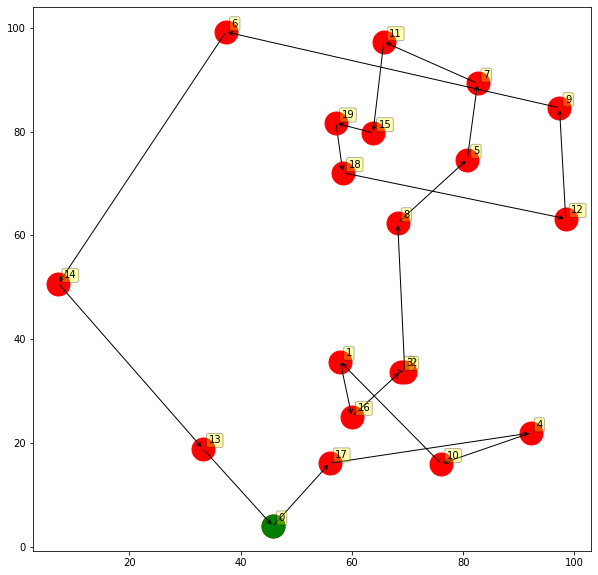

In [6]:
join_points(camino_aco,puntos)